# Arctic Penguin Exploration: Unraveling Clusters in the Icy Domain with K-means clustering

![Alt text](https://imgur.com/orZWHly.png)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! 

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

- culmen_length_mm: culmen length (mm)
- culmen_depth_mm: culmen depth (mm)
- flipper_length_mm: flipper length (mm)
- body_mass_g: body mass (g)
- sex: penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are three species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**, so your task is to apply your data science skills to help them identify groups in the dataset!

In [1]:
# Import Required Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")

In [2]:
# See the top of the dataset
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
# Check the dimension of the dataset and other information
display(penguins_df.shape)

penguins_df.info()

(344, 5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


In [4]:
# Check for null values in each column
penguins_df.isna().sum()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

I'm deciding not to impute the mean or median for null values, as the goal of this project is classification and doing so may lead to inconsistencies. Also, the number of missing values is not large.

In [5]:
# Remove rows with null values
penguins_df.dropna(how='any', axis=0, inplace=True)

# Reset the index after dropping rows with null values
penguins_df.reset_index(drop=True, inplace=True)

# Check that there are no NAs left in the dataset
penguins_df.isna().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [6]:
# View the top 10 rows of the dataset
penguins_df.head(10)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE
5,38.9,17.8,181.0,3625.0,FEMALE
6,39.2,19.6,195.0,4675.0,MALE
7,42.0,20.2,5000.0,4250.0,MALE
8,41.1,17.6,182.0,3200.0,FEMALE
9,38.6,21.2,191.0,3800.0,MALE


In [7]:
# Show summary statistics for the numeric columns
penguins_df.describe().T

,count,mean,std,min,25%,50%,75%,max
culmen_length_mm,335.0,43.988358,5.453430,32.1,39.5,44.5,48.55,59.6
culmen_depth_mm,335.0,17.169552,1.971966,13.1,15.6,17.3,18.70,21.5
flipper_length_mm,335.0,214.355224,263.253508,-132.0,190.0,197.0,213.00,5000.0
body_mass_g,335.0,4209.179104,803.633495,2700.0,3550.0,4050.0,4787.50,6300.0


It appears there may be some outliers, especially in the flipper_length_mm field

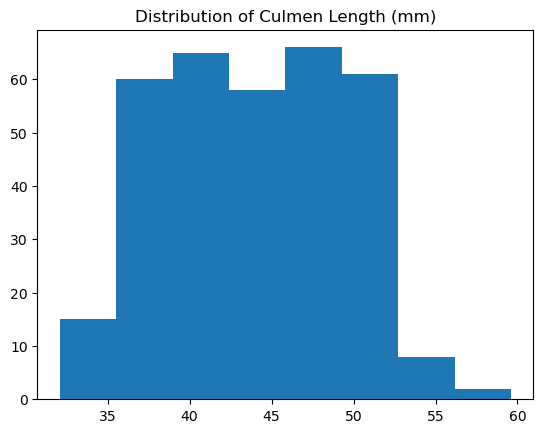

In [8]:
# show distribution of culmen_length_mm
plt.hist(penguins_df.culmen_length_mm, bins=8)
plt.title('Distribution of Culmen Length (mm)')
plt.show()

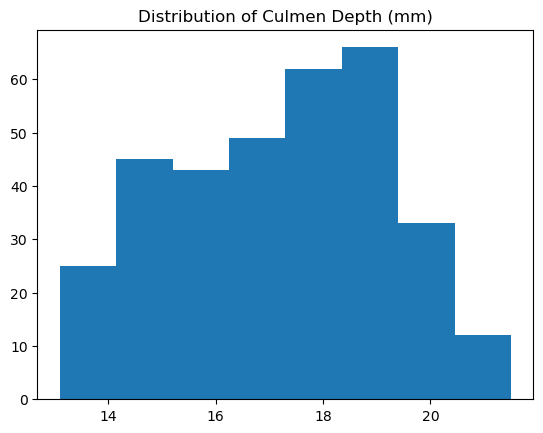

In [9]:
# show distribution of culmen_depth_mm
plt.hist(penguins_df.culmen_depth_mm, bins=8)
plt.title('Distribution of Culmen Depth (mm)')
plt.show()

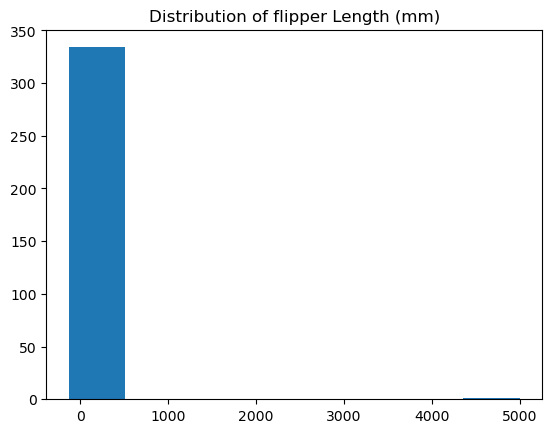

In [10]:
# show distribution of flipper_length_mm
plt.hist(penguins_df.flipper_length_mm, bins=8)
plt.title('Distribution of flipper Length (mm)')
plt.show()

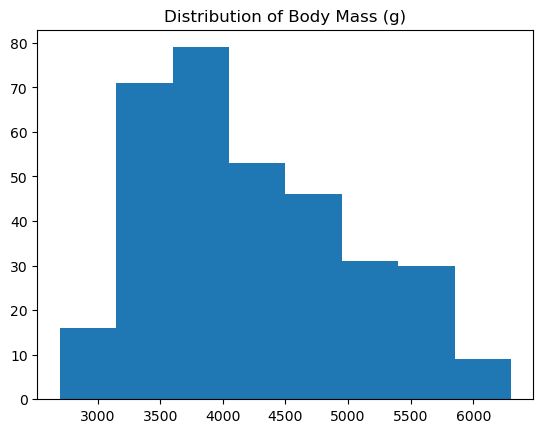

In [11]:
# show distribution of body_mass_g
plt.hist(penguins_df.body_mass_g, bins=8)
plt.title('Distribution of Body Mass (g)')
plt.show()

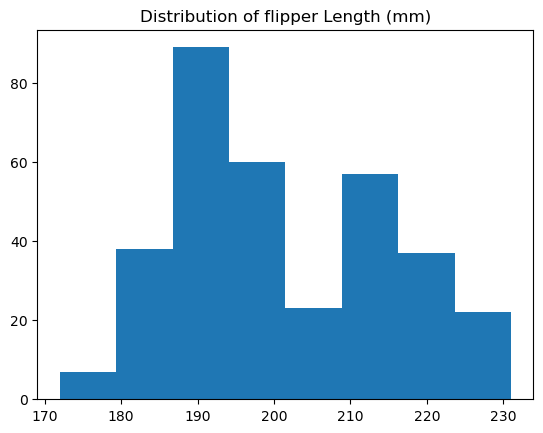

In [12]:
# Create a function for removing outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove the outlier from flipper length
penguins_clean = remove_outliers(penguins_df, 'flipper_length_mm')


# show updated distribution of flipper_length_mm
plt.hist(penguins_clean.flipper_length_mm, bins=8)
plt.title('Distribution of flipper Length (mm)')
plt.show()

In [13]:
# check the values of the sex column
penguins_clean.value_counts('sex')

sex
MALE      167
FEMALE    165
.           1
Name: count, dtype: int64

In [14]:
# remove the '.' from the sex column
penguins_clean = penguins_clean[penguins_clean['sex'] != '.']

# check the values of the sex column
penguins_clean.value_counts('sex')

sex
MALE      167
FEMALE    165
Name: count, dtype: int64

In [15]:
# Create dummy variables for sex column
penguins_clean = pd.get_dummies(penguins_clean)

display(penguins_clean.shape)

penguins_clean.head()

(332, 6)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,False,True
1,39.5,17.4,186.0,3800.0,True,False
2,40.3,18.0,195.0,3250.0,True,False
3,36.7,19.3,193.0,3450.0,True,False
4,39.3,20.6,190.0,3650.0,False,True


In [16]:
# Rename new sex columns to lowercase
# penguins_clean.rename(columns={'FEMALE':'female', 'MALE':'male'}, inplace=True)

# penguins_clean.columns

In [17]:
# Scale the data
scaler = StandardScaler()
X = scaler.fit_transform(penguins_clean)

# Turn result into a DataFrame
penguins_preprocessed = pd.DataFrame(X, columns=penguins_clean.columns)

# View the new penguins_preprocessed df
penguins_preprocessed.head(10)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,-0.903906,0.790360,-1.425342,-0.566948,-0.993994,0.993994
1,-0.830434,0.126187,-1.068577,-0.504847,1.006042,-1.006042
2,-0.683490,0.432728,-0.426399,-1.187953,1.006042,-1.006042
3,-1.344738,1.096901,-0.569105,-0.939551,1.006042,-1.006042
4,-0.867170,1.761074,-0.783164,-0.691149,-0.993994,0.993994
5,-0.940642,0.330548,-1.425342,-0.722199,1.006042,-1.006042
6,-0.885538,1.250172,-0.426399,0.581912,-0.993994,0.993994
7,-0.536545,0.228367,-1.353989,-1.250054,1.006042,-1.006042
8,-0.995746,2.067616,-0.711811,-0.504847,-0.993994,0.993994
9,-1.363106,0.330548,-1.139930,-0.629049,1.006042,-1.006042


In [18]:
penguins_preprocessed

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,-0.903906,0.790360,-1.425342,-0.566948,-0.993994,0.993994
1,-0.830434,0.126187,-1.068577,-0.504847,1.006042,-1.006042
2,-0.683490,0.432728,-0.426399,-1.187953,1.006042,-1.006042
3,-1.344738,1.096901,-0.569105,-0.939551,1.006042,-1.006042
4,-0.867170,1.761074,-0.783164,-0.691149,-0.993994,0.993994
...,...,...,...,...,...,...
327,0.583904,-1.764152,0.929309,0.892415,1.006042,-1.006042
328,0.510432,-1.457611,1.000662,0.799264,1.006042,-1.006042
329,1.171681,-0.742347,1.500134,1.917074,-0.993994,0.993994
330,0.216543,-1.202160,0.786603,1.233968,1.006042,-1.006042


In [19]:
# Create a PCA without specifying n_components
pca = PCA(n_components=None)

# Fit the PCA to the data
dfx_pca = pca.fit(penguins_preprocessed)

# Show the explained variances
dfx_pca.explained_variance_ratio_

array([5.20340616e-01, 3.44631118e-01, 8.58556863e-02, 3.22911959e-02,
       1.68813837e-02, 6.84273553e-33])

In [20]:
# Find optimal n_components by counting how many have an explained variance over 0.1
n_components = sum(dfx_pca.explained_variance_ratio_ > 0.1)

# Create a new PCA, setting n_components=n_components
pca = PCA(n_components=n_components)

# Fit the new PCA
penguins_PCA = pca.fit_transform(penguins_preprocessed)

/Users/nfaupel/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nfaupel/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nfaupel/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nfaupel/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will chang

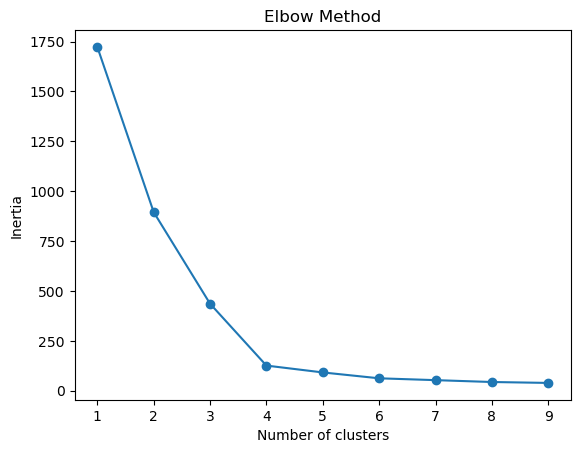

In [21]:
# Step 6 - Detect the optimal number of clusters for k-means clustering
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(penguins_PCA)
    inertia.append(kmeans.inertia_)    
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [22]:
# Based on the above plot, set n_clusters to 4
n_clusters=4

/Users/nfaupel/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


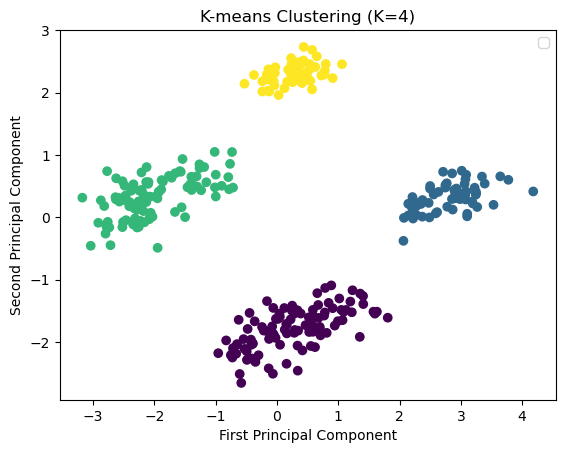

In [23]:
# Run kmeans with optimal number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(penguins_PCA)

# Plot the resulting clusters
plt.scatter(penguins_PCA[:, 0], penguins_PCA[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title(f'K-means Clustering (K={n_clusters})')
plt.legend()
plt.show()

In [24]:
# Add the label column from kmeans to the penguins_clean df
penguins_clean['label'] = kmeans.labels_

# list of just the numeric columns
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm','label']

# find the mean of the numerical columns
stat_penguins = penguins_clean[numeric_columns].groupby('label').mean()

# View the result
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm
label,,,
0,43.878302,19.111321,194.764151
1,49.473770,15.718033,221.540984
2,40.217757,17.611215,189.046729
3,45.563793,14.237931,212.706897
